# Load the dataset and execute the pre-proccesing

In [2]:
from dataset_operations import *

from os import listdir

if 'features_1' in listdir('.'):
    features_1 = read_dataset('features_1')
    labels_1 = read_dataset('labels_1')
else:
    identifiers_1, features_1, labels_1 = load_all_dataset_csvs_to_dataframe('/root/ATHENA-FL/datasets/CICDataset/CSVs/01-12/')
    identifiers_2, features_2, labels_2 = load_all_dataset_csvs_to_dataframe('/root/ATHENA-FL/datasets/CICDataset/CSVs/03-11/')

In [3]:
# calcute the correlation between features
corr_matrix_1 = features_1.corr()
corr_matrix_2 = features_2.corr()

/tmp/ipykernel_2167210/1329120477.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_1 = features_1.corr()
/tmp/ipykernel_2167210/1329120477.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_2 = features_2.corr()


# Remove all NaN features

In [5]:
remove_nan_features(features_1,corr_matrix_1)
remove_nan_features(features_2,corr_matrix_2)

[' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 'FIN Flag Count',
 ' PSH Flag Count',
 ' ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 ' Fwd Avg Packets/Bulk',
 ' Fwd Avg Bulk Rate',
 ' Bwd Avg Bytes/Bulk',
 ' Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

# Show the correlation matrix

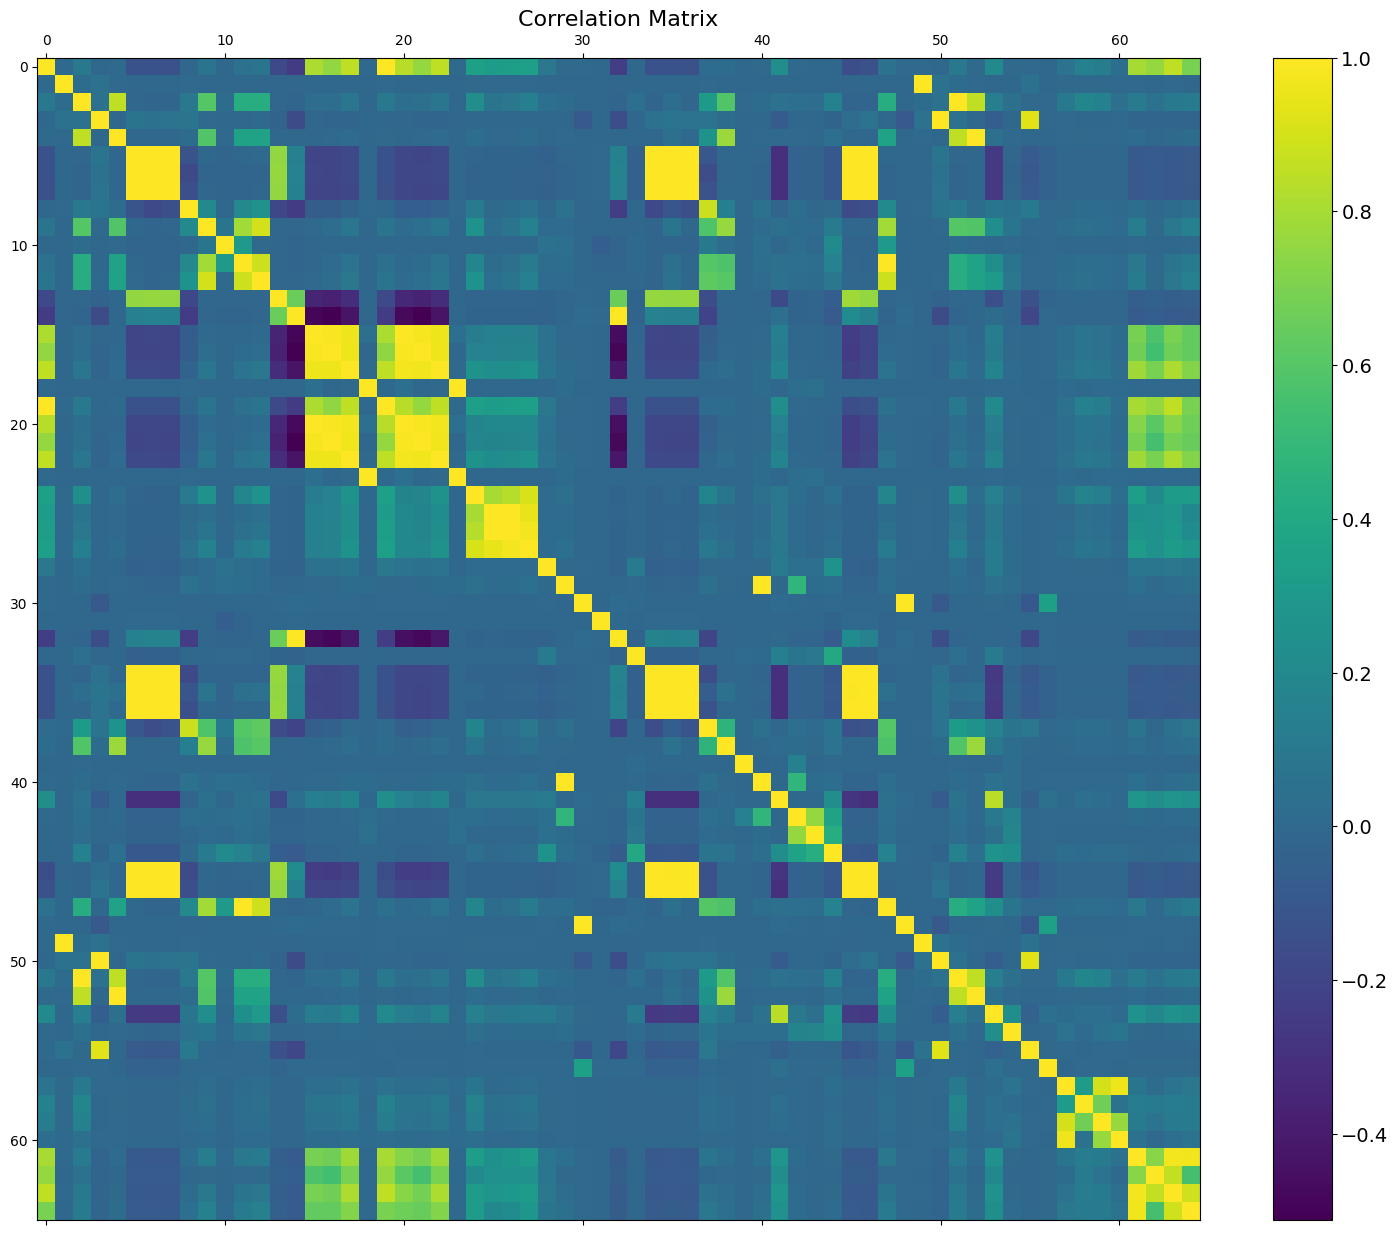

In [6]:
# matrix 1
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_matrix_1, fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
# matrix 2
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_matrix_1, fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
# remove the high correlated features
remove_high_correlation_features(corr_matrix_1,features_1)
remove_high_correlation_features(corr_matrix_2,features_2)

In [ ]:
# matrix 1
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_matrix_1, fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
# matrix 2
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_matrix_1, fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [31]:
x = features_1.copy(deep=True)

x.drop(['SimillarHTTP'],axis=1)

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,1,2,0,884.0,0.0,442.0,442.0,442.0,0.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,0,2346.0,0.0,1173.0,1173.0,1173.0,0.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,0,942.0,0.0,471.0,471.0,471.0,0.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2,0,1020.0,0.0,510.0,510.0,510.0,0.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2,0,1002.0,0.0,501.0,501.0,501.0,0.0,0.0,...,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611369,1,2,0,642.0,0.0,321.0,321.0,321.0,0.0,0.0,...,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2611370,46,2,0,750.0,0.0,375.0,375.0,375.0,0.0,0.0,...,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2611371,50,2,0,802.0,0.0,401.0,401.0,401.0,0.0,0.0,...,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2611372,1,2,0,802.0,0.0,401.0,401.0,401.0,0.0,0.0,...,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Training a Model

In [32]:
import tensorflow as tf

feature_size = 65

model =     tf.keras.models.Sequential([
            tf.keras.layers.Dense(feature_size, activation='relu', name='input'),
            tf.keras.layers.Dense(1024, activation='relu', name='dense_1'),
            tf.keras.layers.Dropout(.2, name='droput_1'),
            tf.keras.layers.Dense(768, activation='relu', name='dense_2'),
            tf.keras.layers.Dropout(.2, name='droput_2'),
            tf.keras.layers.Dense(512, activation='relu', name='dense_3'),
            tf.keras.layers.Dropout(.2, name='droput_3'),
            tf.keras.layers.Dense(256, activation='relu', name='dense_4'),
            tf.keras.layers.Dropout(.2, name='droput_4'),
            tf.keras.layers.Dense(128, activation='relu', name='dense_5'),
            tf.keras.layers.Dropout(.2, name='droput_5'),
            tf.keras.layers.Dense(128, activation='relu', name='dense_6'),
            tf.keras.layers.Dense(1, activation='sigmoid')])


In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [34]:
bs = 64

model.fit(x,labels_1,epochs=10,batch_size=bs,steps_per_epoch=int(len(features_1)//bs))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).